<a href="https://colab.research.google.com/github/saudyusaf/data-science/blob/main/program17.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Import necessary libraries
import numpy as np #Provides support for numerical operations, particularly arrays.
import pandas as pd #for handling and analyzing data in DataFrames, making it easy to load, manipulate, and process datasets.
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
         # LinearRegression: A class in sklearn.linear_model that enables fitting a linear model to data.
         #mean_squared_error, r2_score: Functions in sklearn.metrics used to evaluate model performance.
# Loads the student_scores.csv dataset into a pandas DataFrame named student.
student = pd.read_csv('/content/student_scores.csv')
# Display the first few rows and basic info about the dataset
print(student.head())  #Displays the first 5 rows of the dataset
print(student.describe()) #Provides summary statistics (like mean, min, max, etc.)
print(student.info()) #information about each column, including the data type and non-null count


   Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30
           Hours     Scores
count  25.000000  25.000000
mean    5.012000  51.480000
std     2.525094  25.286887
min     1.100000  17.000000
25%     2.700000  30.000000
50%     4.800000  47.000000
75%     7.400000  75.000000
max     9.200000  95.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 532.0 bytes
None


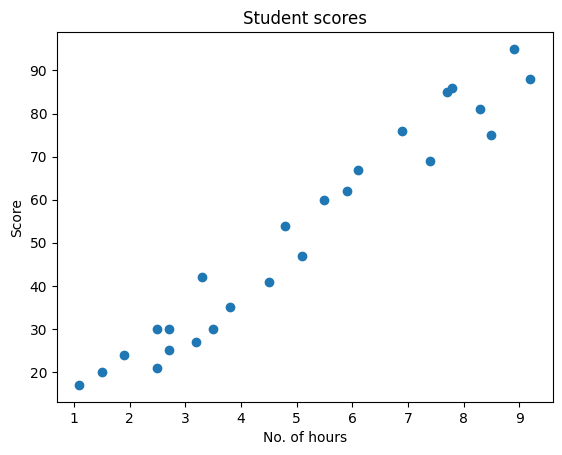

In [3]:


# Separate the features (No. of hours) and target (Score)
Xax = student.iloc[:, 0]   # Selects the first column (No. of hours) as the independent variable (Xax).
Yax = student.iloc[:, 1]   # Selects the second column (Score) as the dependent variable (Yax).

# Visualize the data with a scatter plot
plt.scatter(Xax, Yax)
plt.xlabel("No. of hours")
plt.ylabel("Score")
53

plt.title("Student scores")
plt.show()

In [4]:

# Prepare data for training and testing
x = student.iloc[:,:-1] #Selects all columns except the last one as the independent variable (hours studied).
y = student.iloc[:, 1]     # Selects the last column as the dependent variable (score).
print('x values :\n', x)
print('y values :\n', y)


x values :
     Hours
0     2.5
1     5.1
2     3.2
3     8.5
4     3.5
5     1.5
6     9.2
7     5.5
8     8.3
9     2.7
10    7.7
11    5.9
12    4.5
13    3.3
14    1.1
15    8.9
16    2.5
17    1.9
18    6.1
19    7.4
20    2.7
21    4.8
22    3.8
23    6.9
24    7.8
y values :
 0     21
1     47
2     27
3     75
4     30
5     20
6     88
7     60
8     81
9     25
10    85
11    62
12    41
13    42
14    17
15    95
16    30
17    24
18    67
19    69
20    30
21    54
22    35
23    76
24    86
Name: Scores, dtype: int64


In [5]:


# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,
random_state=42)

# Train the Linear Regression model
regressor = LinearRegression() #Initializes the linear regression model.
regressor.fit(x_train, y_train)    # Trains (fits) the model on the training data, finding the best- # fit line that predicts scores based on hours studied.
# Output the intercept and coefficient
print('INTERCEPT = ', regressor.intercept_) #Retrieves the y-intercept of the regression line.
print('COEFFICIENT = ', regressor.coef_[0]) #Retrieves the slope (coefficient) of the regression line
#These values represent the linear equation: Score = (Coefficient * Hours) + Intercept

INTERCEPT =  2.826892353899737
COEFFICIENT =  9.682078154455697


In [6]:

# Make predictions on the test set
y_pred = regressor.predict(x_test) #Uses the trained model to predict scores (y_pred) for
 # the test set based on hours studied in x_test.
# Print the actual vs predicted values
print("Actual vs Predicted values:")
for actual, predicted in zip(y_test, y_pred):
    print("Actual value:", actual, "Predicted value:", predicted)
  #Iterates over each actual and predicted value pair, printing them for comparison.

Actual vs Predicted values:
Actual value: 81 Predicted value: 83.18814103588203
Actual value: 30 Predicted value: 27.03208774003898
Actual value: 21 Predicted value: 27.03208774003898
Actual value: 76 Predicted value: 69.63323161964405
Actual value: 62 Predicted value: 59.951153465188355


In [7]:

# Calculate and print the number of mislabeled points
mislabeled_points = np.sum(np.round(y_test) != np.round(y_pred))
#Counts the number of mismatched points between the actual (y_test) and predicted (y_pred) values
#(after rounding to avoid small numerical differences).
print("Number of mislabeled points from test data set:", mislabeled_points)

Number of mislabeled points from test data set: 5


In [8]:


# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred) #Calculates the Mean Squared Error (MSE) between #actual

r2 = r2_score(y_test, y_pred)# Calculates the R-squared score, which indicates how well the model fits #the

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 18.943211722315272
R-squared: 0.9678055545167994
